In [1]:
import numpy as np

In [2]:
dtype1=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

In [3]:
np.loadtxt(fname='pulse_pdv_test_paz', dtype=dtype1)

array([(0,    0,    0, 4109.61  ), (0,    0,    1, 1933.14  ),
       (0,    0,    2, 2455.87  ), ..., (0, 4095, 1021,   47.6865),
       (0, 4095, 1022, -157.64  ), (0, 4095, 1023,   68.3533)],
      dtype=[('pulse', '<i8'), ('frequency', '<i8'), ('phase', '<i8'), ('intensity', '<f8')])

In [4]:
fulldata = np.loadtxt(fname='pulse_pdv_test_paz', dtype=dtype1)

In [5]:
(fulldata['frequency'] == 0) & (fulldata['phase'] == 0)

array([ True, False, False, ..., False, False, False])

In [6]:
f0p0 = (fulldata['frequency'] == 0) & (fulldata['phase'] == 0)

In [7]:
print(f0p0)
print(fulldata['frequency'][f0p0])
print(fulldata['phase'][f0p0])
print(fulldata['intensity'][f0p0]) 

[ True False False ... False False False]
[0]
[0]
[4109.61]


Above is pretending that you cannot do pdv, and averaging out multiple pulses into one that way. Would need to be looped.
Below is assuming we have done it through unix commands to pdv -T and create a file containing a single averaged pulse. 

In [8]:
fulldata

array([(0,    0,    0, 4109.61  ), (0,    0,    1, 1933.14  ),
       (0,    0,    2, 2455.87  ), ..., (0, 4095, 1021,   47.6865),
       (0, 4095, 1022, -157.64  ), (0, 4095, 1023,   68.3533)],
      dtype=[('pulse', '<i8'), ('frequency', '<i8'), ('phase', '<i8'), ('intensity', '<f8')])

In [9]:
averagepulse = fulldata

In [10]:
averagepulse

array([(0,    0,    0, 4109.61  ), (0,    0,    1, 1933.14  ),
       (0,    0,    2, 2455.87  ), ..., (0, 4095, 1021,   47.6865),
       (0, 4095, 1022, -157.64  ), (0, 4095, 1023,   68.3533)],
      dtype=[('pulse', '<i8'), ('frequency', '<i8'), ('phase', '<i8'), ('intensity', '<f8')])

In [46]:
import scipy as sp

In [47]:
import matplotlib.pyplot as py

In [48]:
import pandas as pd

In [49]:
import plotly.graph_objects as go

In [50]:
f1 = fulldata['frequency'] == 1

Text(0, 0.5, 'Intensity')

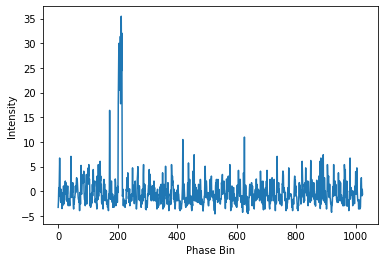

In [51]:
py.plot(averagepulse['phase'][f1], averagepulse['intensity'][f1])
py.xlabel('Phase Bin')
py.ylabel('Intensity')

In [52]:
time_series = averagepulse['intensity'][f1]

In [53]:
len(time_series)

1024

In [81]:
indices = sp.signal.find_peaks(time_series, prominence=10)[0]

In [82]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))
fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [56]:
f2 = fulldata['frequency'] == 2

In [57]:
time_series2 = averagepulse['intensity'][f2]

In [69]:
indices2 = sp.signal.find_peaks(time_series2, width=5)[0]

In [70]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series2,
    mode='lines+markers',
    name='Original Plot'
))
fig.add_trace(go.Scatter(
    x=indices2,
    y=[time_series2[j] for j in indices2],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()